In [7]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/jfm343/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['axis', 'save', 'figure', 'fill']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [8]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [9]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1.5/data2022-05-03-19-19-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__

In [10]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5


##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=2000,600
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,'CH1')
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, 'CH1')
Vol_rec2=l2.Vol_BZ()



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,'CH1')

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)


indmin=np.argmin((ed.earr-(ed.mu))**2)
indmax=np.argmin((ed.earr-(ed.mu+20))**2)
print(indmin, indmax)


print(np.max(ed.earr), np.min(ed.earr), ed.mu, np.size(ed.earr))

nu=ed.earr[indmin:indmax]-ed.mu
ome=np.linspace(-2*np.pi, 2*np.pi, 2000)
dome=ome[1]-ome[0]
rhonu=ed.Dos[indmin:indmax]

from scipy import stats
slope, intercept, r, p, se = stats.linregress(ed.earr[indmin:indmax], rhonu)


from scipy.special import spence as dilog2
def analytical_form(omega,T, alpha):
    Jpre=10.34
    
    z=alpha*Jpre/T
    x=omega/T
    
    exp_sum=np.exp(-(z+x))
    exp_dif=np.exp(-(-z+x))
    exp_zero=np.exp(z)
    dilog_1=dilog2(1-(-exp_sum))
    dilog_2=dilog2(1-(-exp_dif))
    dilog_3=dilog2(1-(1-exp_zero))
    
    dilogterms=(-dilog_2+dilog_1-2*dilog_3)/z
    logterm=np.log((exp_sum+1)*(exp_dif+1))
    
    
    
    return alpha*(dilogterms-logterm-z/2)



Machine arg is, CH1
Machine arg is, CH1
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 2.0606346130371094
2352 2513
227.9605415860735 -267.41895551257255 23.93702777725383 4000


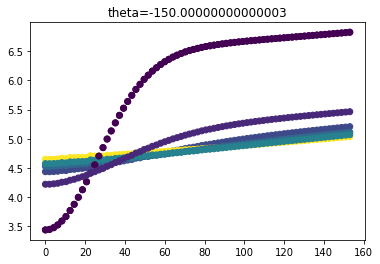

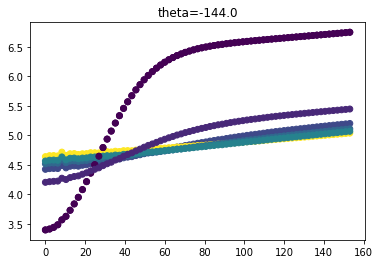

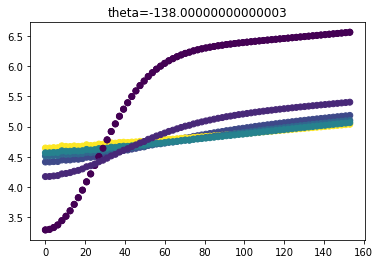

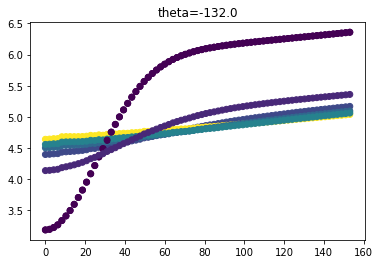

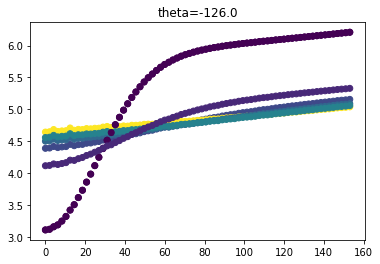

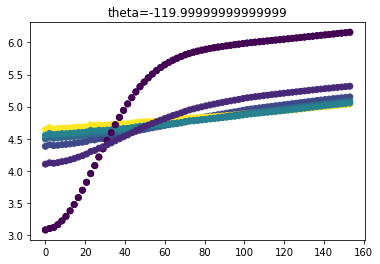

[ 3. 10.  4.  1.  5.  2.]


In [11]:
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     plt.title('theta='+str(th*180/np.pi))
    
# print(tss)

thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'],df2['SE'], c=df2['T'] )
    plt.title('theta='+str(th*180/np.pi))
    plt.show()
    
print(tss)

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


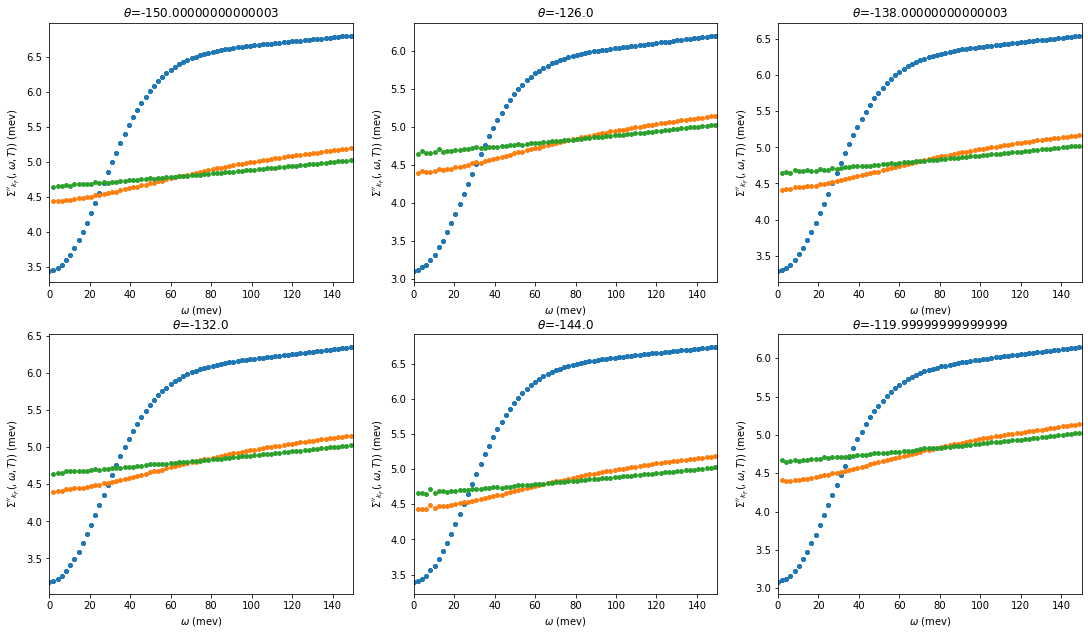

In [12]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"$\Sigma''_{k_F}(,\omega, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

-150.00000000000003
0 0 0


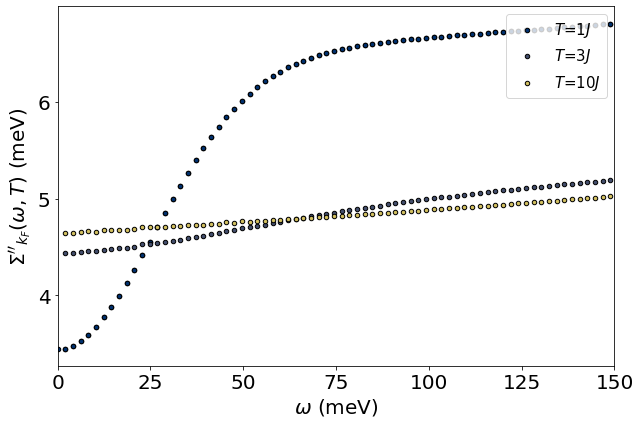

In [13]:
N,M=1,1
figure, axis = plt.subplots(N,M, figsize = (9, 6))
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(int(T))+r"$J$",s=20, color=plt.cm.cividis(T/12), zorder=T, edgecolor='k')
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=20)
    axis.set_xlabel(r"$\omega$ (meV)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()
plt.savefig("imgs/pap_fig2c", dpi=400)

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1.5/data2022-05-03-19-19-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__

/tmp/ipykernel_430825/1723838168.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


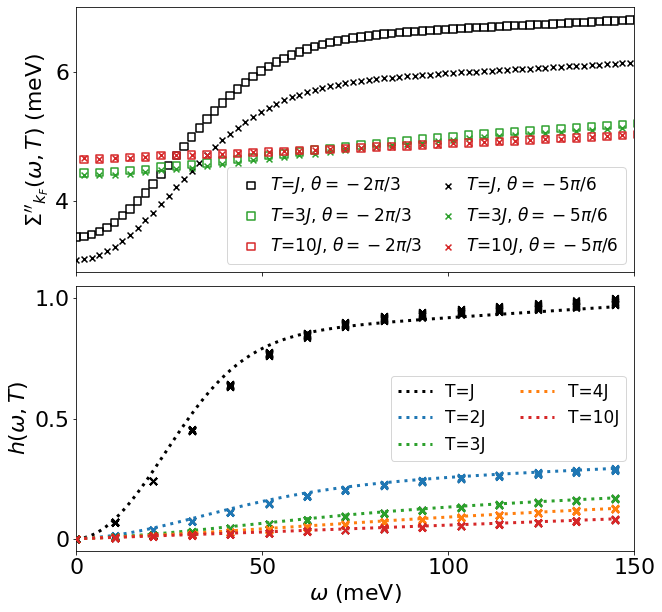

In [14]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all', figsize = (9, 9))
# gs = figure.add_gridspec(2, wspace=0, hspace=0)
figure = plt.figure(figsize = (10, 10))
gs = figure.add_gridspec(2, hspace=.05)
axis = gs.subplots(sharex=True)

tiksz=22
lblsz=22
lgnsz=16
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
thetadeg=df['theta'].unique()[0]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=-2\pi/3$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=\frac{-2\pi}{3}$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        else:
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-2\pi/3$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)


thets=[df['theta'].unique()[-1]]
thetadeg=df['theta'].unique()[-1]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            # axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=plt.cm.tab10(index[str(int(T))]), zorder=T, marker="x")
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
        else:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")

            
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    # axis[0].set_xlabel(r"$\omega$ (meV)", size=20)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=3)
yt=[4,6]
ytpos=np.array([4,6])
axis[0].set_yticks(ytpos)
axis[0].set_yticklabels(yt,size=tiksz)
axis[0].legend(prop={'size': lgnsz+1}, ncol=2,columnspacing=.5 ,handletextpad=0.1)




path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')

alph=np.pi*0.9758793969849247
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    if int(T)!=5:
        for s,Qq in enumerate(Q):
            # print(s)
            line=(w/10.34 +ed.mu)*slope+intercept
            
            if c[int(T)-1]==0:
                
                w2=np.linspace(0,np.max(w),200)
                line=(w2/10.34 +ed.mu)*slope+intercept
                anf_pre=(analytical_form(w2,T*10.34, alph) )*(line)

                anf=anf_pre
                if T==1.0:
                    axis[1].plot(w2, anf/anf[0]-1,color=csheme[index[str(int(T))]],lw=3, ls=':', label='T=J', zorder=T)
                else:
                    
                    axis[1].plot(w2, anf/anf[0]-1,color=csheme[index[str(int(T))]],lw=3, ls=':', label='T='+str(int(T))+'J', zorder=T)
                c[int(T)-1]=c[int(T)-1]+1
            y2=(np.array(d.iloc[s]))
            y=y2/y2[0]-1
            
            
            axis[1].scatter(w, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
            

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1.0,2.0,3.0,4.0,5.0,10.0]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        

yt=[0,0.5,1.0]
ytpos=np.array([0,0.5,1.0])
axis[1].set_yticks(ytpos)
axis[1].set_yticklabels(yt,size=tiksz)

xt=[0,50,100,150]
xtpos=np.array([0,50,100,150])
axis[1].set_xticks(xtpos)
axis[1].set_xticklabels(xt,size=tiksz )

axis[1].legend(prop={'size': lgnsz+1}, ncol=2)
axis[1].set_ylabel(r"$h(\omega, T)$", size=lblsz)
axis[1].set_xlabel(r"$\omega$ (meV)", size=lblsz)
axis[1].set_xlim([0,150])
# axis[1].set_ylim([0,0.35])

plt.tight_layout()

plt.savefig("imgs/pap_fig4", dpi=400)


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1.5/data2022-05-03-19-19-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__

/tmp/ipykernel_430825/3813700520.py:231: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


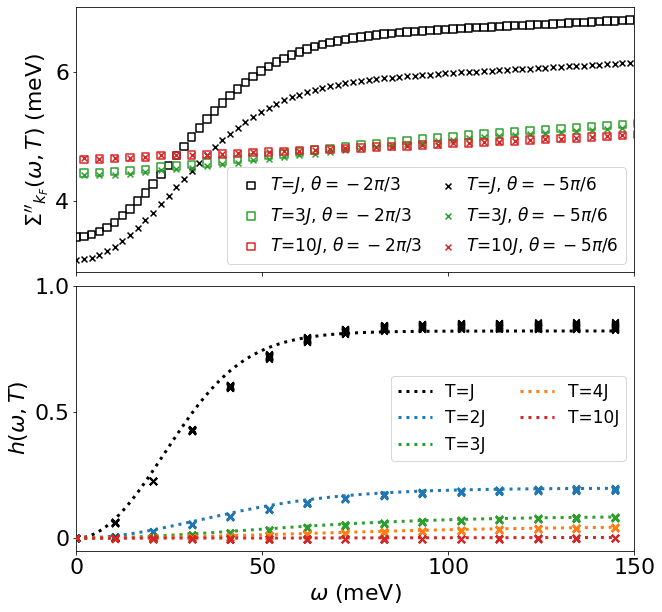

In [15]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all', figsize = (9, 9))
# gs = figure.add_gridspec(2, wspace=0, hspace=0)
figure = plt.figure(figsize = (10, 10))
gs = figure.add_gridspec(2, hspace=.05)
axis = gs.subplots(sharex=True)

tiksz=22
lblsz=22
lgnsz=16
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
thetadeg=df['theta'].unique()[0]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=-2\pi/3$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=\frac{-2\pi}{3}$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        else:
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-2\pi/3$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)


thets=[df['theta'].unique()[-1]]
thetadeg=df['theta'].unique()[-1]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            # axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=plt.cm.tab10(index[str(int(T))]), zorder=T, marker="x")
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
        else:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")

            
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    # axis[0].set_xlabel(r"$\omega$ (meV)", size=20)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=3)
yt=[4,6]
ytpos=np.array([4,6])
axis[0].set_yticks(ytpos)
axis[0].set_yticklabels(yt,size=tiksz)
axis[0].legend(prop={'size': lgnsz+1}, ncol=2,columnspacing=.5 ,handletextpad=0.1)




path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')

alph=np.pi*0.9758793969849247
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    if int(T)!=5:
        for s,Qq in enumerate(Q):
            # print(s)
            line=(w/10.34 +ed.mu)*slope+intercept
            
            if c[int(T)-1]==0:
                
                w2=np.linspace(0,np.max(w),200)
                line=(w2/10.34 +ed.mu)*slope+intercept
                anf_pre=(analytical_form(w2,T*10.34, alph) )

                anf=anf_pre
                if T==1.0:
                    axis[1].plot(w2, anf/anf[0]-1,color=csheme[index[str(int(T))]],lw=3, ls=':', label='T=J', zorder=T)
                else:
                    
                    axis[1].plot(w2, anf/anf[0]-1,color=csheme[index[str(int(T))]],lw=3, ls=':', label='T='+str(int(T))+'J', zorder=T)
                c[int(T)-1]=c[int(T)-1]+1
            line2=(w/10.34 +ed.mu)*slope+intercept
            y2=(np.array(d.iloc[s]))/(line2)
            y=y2/y2[0]-1
            
            
            axis[1].scatter(w, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
            

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1.0,2.0,3.0,4.0,5.0,10.0]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        

yt=[0,0.5,1.0]
ytpos=np.array([0,0.5,1.0])
axis[1].set_yticks(ytpos)
axis[1].set_yticklabels(yt,size=tiksz)

xt=[0,50,100,150]
xtpos=np.array([0,50,100,150])
axis[1].set_xticks(xtpos)
axis[1].set_xticklabels(xt,size=tiksz )

axis[1].legend(prop={'size': lgnsz+1}, ncol=2)
axis[1].set_ylabel(r"$h(\omega, T)$", size=lblsz)
axis[1].set_xlabel(r"$\omega$ (meV)", size=lblsz)
axis[1].set_xlim([0,150])
# axis[1].set_ylim([0,0.35])

plt.tight_layout()

plt.savefig("imgs/pap_fig4", dpi=400)

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1.5/data2022-05-03-19-19-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__

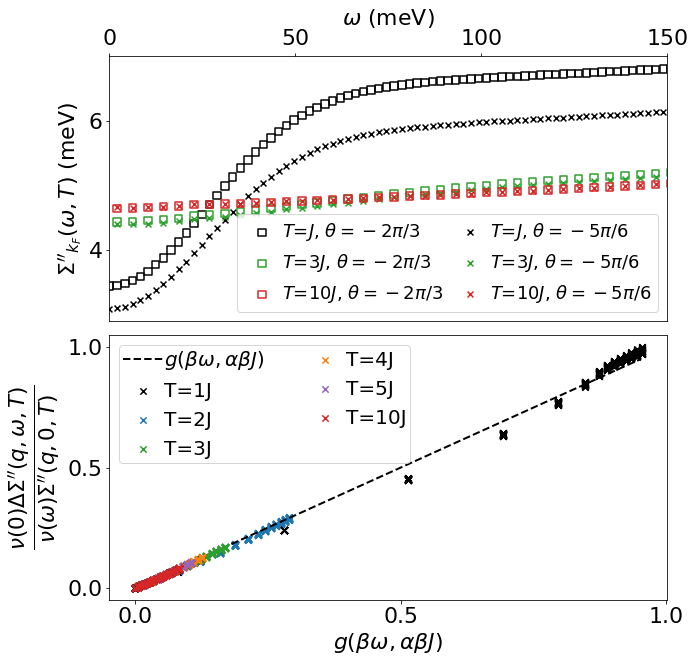

In [16]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all', figsize = (9, 9))
# gs = figure.add_gridspec(2, wspace=0, hspace=0)
figure = plt.figure(figsize = (10, 10))
gs = figure.add_gridspec(2, hspace=.05)
axis = gs.subplots()

tiksz=22
lblsz=22
lgnsz=16
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
thetadeg=df['theta'].unique()[0]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=-2\pi/3$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=\frac{-2\pi}{3}$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        else:
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-2\pi/3$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)


thets=[df['theta'].unique()[-1]]
thetadeg=df['theta'].unique()[-1]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            # axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=plt.cm.tab10(index[str(int(T))]), zorder=T, marker="x")
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
        else:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")

            
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    # axis[0].set_xlabel(r"$\omega$ (meV)", size=20)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=3)
    

xt=[0,50,100,150]
xtpos=np.array([0,50,100,150])
axis[0].set_xticks(xtpos)
axis[0].set_xticklabels(xt,size=tiksz )
axis[0].set_xlabel(r"$\omega$ (meV)", size=lblsz)
axis[0].xaxis.tick_top()
axis[0].xaxis.set_label_position('top') 
# axis[0].text(62.5, 2.5,r"$\omega$ (meV)",size=lblsz)
yt=[4,6]
ytpos=np.array([4,6])
axis[0].set_yticks(ytpos)
axis[0].set_yticklabels(yt,size=tiksz)
axis[0].legend(prop={'size': lgnsz+2}, ncol=2,columnspacing=.5 ,handletextpad=0.1)


################################################################################################################################################

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')
# fig,ax=plt.subplots(1,1)
alph=np.pi*0.97
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]


currentI=0
currentT=1
Tarr=[1.0,2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    global currentI
    global currentT
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph) )*(line)
        a=a2/a2[0]-1
        if T==currentT:

            axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]], label='T='+str(int(currentT))+'J')
            if currentI==np.size(Tarr)-1:
                currentI=0
                currentT=0
            else:
                currentI=currentI+1
                currentT=Tarr[currentI]
        else:
            axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
                            
        

        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in Tarr:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
    
x=np.linspace(0,.95,100)
axis[1].plot(x,x, ls='--', c='k', lw=2, label=r'$g(\beta\omega, \alpha\beta J)$')
        

axis[1].legend(prop={'size': lgnsz+4}, ncol=2,borderpad=0.2,handletextpad=0.05)
axis[1].set_ylabel(r"$\frac{\nu(0)\Delta\Sigma''(q,\omega, T)} {\nu(\omega)\Sigma''(q,0, T)}$", size=lblsz*1.4)
axis[1].set_xlabel(r"$g(\beta\omega,\alpha\beta J)$", size=lblsz)
axis[1].tick_params(axis='x', which='major', labelsize=lblsz)
axis[1].tick_params(axis='y', which='major', labelsize=lblsz)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)
# axis[1].set_xlim([0,0.35])
# axis[1].set_ylim([0,0.35])

# plt.tight_layout()

plt.savefig("imgs/pap_fig4", dpi=400)


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__1.5/data_ME_2022-07-05-13-54-15.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/dat

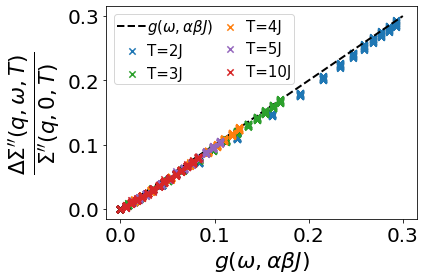

In [17]:

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')
fig,ax=plt.subplots(1,1)
alph=np.pi*0.9758793969849247
# alph=np.pi*0.957
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]


currentI=0
currentT=2
Tarr=[2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    global currentI
    global currentT
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph) )*(line)
        a=a2/a2[0]-1
        if T==currentT:
            ax.scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]], label='T='+str(int(currentT))+'J')
            if currentI==np.size(Tarr)-1:
                currentI=0
                currentT=0
            else:
                currentI=currentI+1
                currentT=Tarr[currentI]
        else:
            ax.scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
                            
        

        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in Tarr:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
    
x=np.linspace(0,.3,100)
ax.plot(x,x, ls='--', c='k', lw=2, label=r"$g(\omega, \alpha \beta J)$")
        

ax.legend(prop={'size': lgnsz+-1}, ncol=2,borderpad=0.2,handletextpad=0.05,columnspacing=.1)
ax.set_ylabel(r"$\frac{\Delta\Sigma''(q,\omega, T)} {\Sigma''(q,0, T)}$", size=lblsz*1.4)
ax.set_xlabel(r"$g(\omega, \alpha \beta J)$", size=lblsz)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
# ax.set_xscale('log')
# ax.set_yscale('log')
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

plt.tight_layout()

plt.savefig("imgs/scaling.png", dpi=400)
plt.show()

In [18]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all', figsize = (9, 9))
# gs = figure.add_gridspec(2, wspace=0, hspace=0)
figure = plt.figure(figsize = (10, 10))
gs = figure.add_gridspec(2, hspace=.05)
axis = gs.subplots()

tiksz=22
lblsz=22
lgnsz=16
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
thetadeg=df['theta'].unique()[0]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=-2\pi/3$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=\frac{-2\pi}{3}$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        else:
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-2\pi/3$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)


thets=[df['theta'].unique()[-1]]
thetadeg=df['theta'].unique()[-1]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            # axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=plt.cm.tab10(index[str(int(T))]), zorder=T, marker="x")
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
        else:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")

            
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    # axis[0].set_xlabel(r"$\omega$ (meV)", size=20)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=3)
    

xt=[0,50,100,150]
xtpos=np.array([0,50,100,150])
axis[0].set_xticks(xtpos)
axis[0].set_xticklabels(xt,size=tiksz )
axis[0].set_xlabel(r"$\omega$ (meV)", size=lblsz)
axis[0].xaxis.tick_top()
axis[0].xaxis.set_label_position('top') 
# axis[0].text(62.5, 2.5,r"$\omega$ (meV)",size=lblsz)
yt=[4,6]
ytpos=np.array([4,6])
axis[0].set_yticks(ytpos)
axis[0].set_yticklabels(yt,size=tiksz)
axis[0].legend(prop={'size': lgnsz+2}, ncol=2,columnspacing=.5 ,handletextpad=0.1)


################################################################################################################################################

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')
fig,ax=plt.subplots(1,1)
alph=np.pi*0.97
# alph=np.pi*0.957
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]


currentI=0
currentT=2
Tarr=[2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    global currentI
    global currentT
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph) )*(line)
        a=a2/a2[0]-1
        if T==currentT:
            ax.scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]], label='T='+str(int(currentT))+'J')
            if currentI==np.size(Tarr)-1:
                currentI=0
                currentT=0
            else:
                currentI=currentI+1
                currentT=Tarr[currentI]
        else:
            ax.scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
                            
        

        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in Tarr:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
    
x=np.linspace(0,.3,100)
ax.plot(x,x, ls='--', c='k', lw=2, label=r"$g(\omega, \alpha \beta J)$")
        

ax.legend(prop={'size': lgnsz+-1}, ncol=2,borderpad=0.2,handletextpad=0.05,columnspacing=.1)
ax.set_ylabel(r"$\frac{\Delta\Sigma''(q,\omega, T)} {\Sigma''(q,0, T)}$", size=lblsz*1.4)
ax.set_xlabel(r"$g(\omega, \alpha \beta J)$", size=lblsz)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
# ax.set_xscale('log')
# ax.set_yscale('log')
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

plt.tight_layout()

plt.savefig("imgs/scaling.png", dpi=400)
plt.show()
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')
# fig,ax=plt.subplots(1,1)
alph=np.pi*0.945
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]


currentI=0
currentT=2
Tarr=[2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    global currentI
    global currentT
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph) )*(line)
        a=a2/a2[0]-1
        if T==currentT:

            axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]], label='T='+str(int(currentT))+'J')
            if currentI==np.size(Tarr)-1:
                currentI=0
                currentT=0
            else:
                currentI=currentI+1
                currentT=Tarr[currentI]
        else:
            axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
                            
        

        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in Tarr:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
    
x=np.linspace(0,.35,100)
axis[1].plot(x,x, ls='--', c='k', lw=2, label=r'$g(\omega, \alpha\beta J)$')
        

axis[1].legend(prop={'size': lgnsz+4}, ncol=2,borderpad=0.2,handletextpad=0.05)
axis[1].set_ylabel(r"$h(\omega,T,q_{\perp},k_F)$", size=lblsz)
axis[1].set_xlabel(r"$g(\omega,\alpha\beta J)$", size=lblsz)
axis[1].tick_params(axis='x', which='major', labelsize=lblsz)
axis[1].tick_params(axis='y', which='major', labelsize=lblsz)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

# plt.tight_layout()

plt.savefig("imgs/pap_fig43", dpi=400)

IndentationError: unexpected indent (831566644.py, line 261)

# using kappa from fit

In [ ]:
kappa=2.11
alpha=2/kappa

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1.5/data2022-05-03-19-19-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__

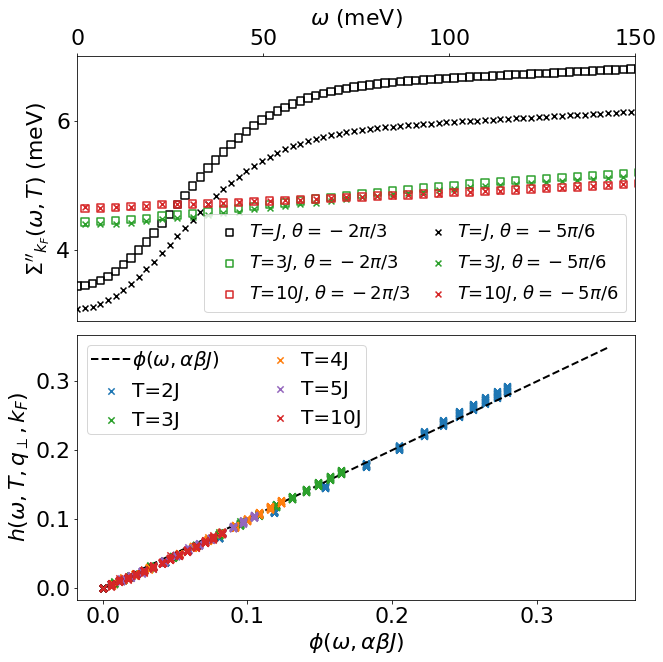

In [25]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all', figsize = (9, 9))
# gs = figure.add_gridspec(2, wspace=0, hspace=0)
figure = plt.figure(figsize = (10, 10))
gs = figure.add_gridspec(2, hspace=.05)
axis = gs.subplots()

tiksz=22
lblsz=22
lgnsz=16
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
thetadeg=df['theta'].unique()[0]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=-2\pi/3$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=\frac{-2\pi}{3}$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        else:
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-2\pi/3$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)


thets=[df['theta'].unique()[-1]]
thetadeg=df['theta'].unique()[-1]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if int(T)==1:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            # axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=plt.cm.tab10(index[str(int(T))]), zorder=T, marker="x")
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
        else:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")

            
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    # axis[0].set_xlabel(r"$\omega$ (meV)", size=20)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=3)
    

xt=[0,50,100,150]
xtpos=np.array([0,50,100,150])
axis[0].set_xticks(xtpos)
axis[0].set_xticklabels(xt,size=tiksz )
axis[0].set_xlabel(r"$\omega$ (meV)", size=lblsz)
axis[0].xaxis.tick_top()
axis[0].xaxis.set_label_position('top') 
# axis[0].text(62.5, 2.5,r"$\omega$ (meV)",size=lblsz)
yt=[4,6]
ytpos=np.array([4,6])
axis[0].set_yticks(ytpos)
axis[0].set_yticklabels(yt,size=tiksz)
axis[0].legend(prop={'size': lgnsz+2}, ncol=2,columnspacing=.5 ,handletextpad=0.1)


################################################################################################################################################

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')
# fig,ax=plt.subplots(1,1)
alph=np.pi*(0.945)
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]


currentI=0
currentT=2
Tarr=[2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    global currentI
    global currentT
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph) )*(line)
        a=a2/a2[0]-1
        if T==currentT:

            axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]], label='T='+str(int(currentT))+'J')
            if currentI==np.size(Tarr)-1:
                currentI=0
                currentT=0
            else:
                currentI=currentI+1
                currentT=Tarr[currentI]
        else:
            axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
                            
        

        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in Tarr:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
    
x=np.linspace(0,0.35,100)
axis[1].plot(x,x, ls='--', c='k', lw=2, label=r'$\phi(\omega, \alpha\beta J)$')
        

axis[1].legend(prop={'size': lgnsz+4}, ncol=2,borderpad=0.2,handletextpad=0.05)
axis[1].set_ylabel(r"$h(\omega,T,q_{\perp},k_F)$", size=lblsz)
axis[1].set_xlabel(r"$\phi(\omega,\alpha\beta J)$", size=lblsz)
axis[1].tick_params(axis='x', which='major', labelsize=lblsz)
axis[1].tick_params(axis='y', which='major', labelsize=lblsz)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

# plt.tight_layout()

plt.savefig("imgs/pap_fig43", dpi=400)

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1.5/data2022-07-05-12-10-57.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__

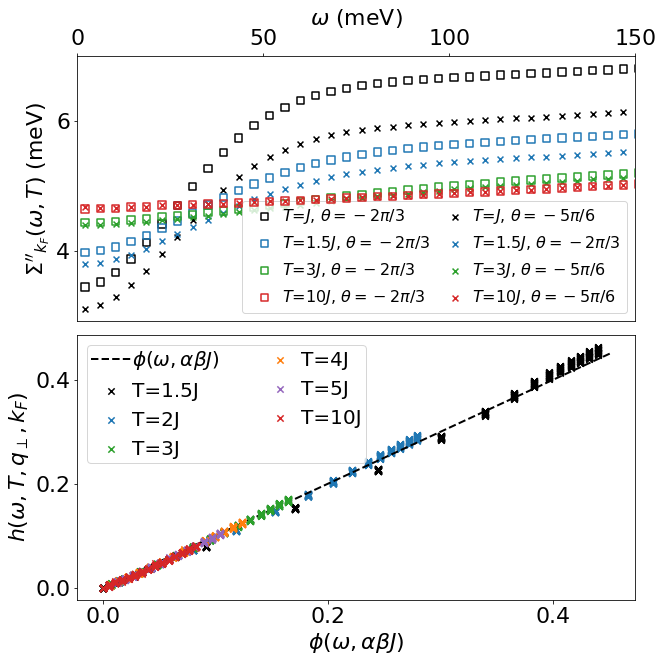

In [50]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all', figsize = (9, 9))
# gs = figure.add_gridspec(2, wspace=0, hspace=0)
figure = plt.figure(figsize = (10, 10))
gs = figure.add_gridspec(2, hspace=.05)
axis = gs.subplots()

tiksz=22
lblsz=22
lgnsz=16
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
thetadeg=df['theta'].unique()[0]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1,1.5,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        if T==1:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=-2\pi/3$',s=55, edgecolors=csheme[index[str(int(np.ceil(T)))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$=$J$, $\theta=\frac{-2\pi}{3}$',s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        elif T==1.5:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+r"1.5$J$, $\theta=-2\pi/3$",s=55, edgecolors=csheme[index[str(int(np.ceil(T)))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        
        else:
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-2\pi/3$",s=55, edgecolors=csheme[index[str(int(np.ceil(T)))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)

        # print(df3.iloc[0]['SE'])
        # a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)


thets=[df['theta'].unique()[-1]]
thetadeg=df['theta'].unique()[-1]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1,1.5,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        print(T,y)
        
            
        err=df3['error']
        if T==1:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            # axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=plt.cm.tab10(index[str(int(T))]), zorder=T, marker="x")
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(np.ceil(T)))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r"$T$=$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
        
        elif T==1.5:
            # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+r"$1.5J$, $\theta=-2\pi/3$",s=35, color=csheme[index[str(int(np.ceil(T)))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)


        else:
            axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-5\pi/6$",s=35, color=csheme[index[str(int(np.ceil(T)))]], zorder=T, marker="x")
            # axis[0].scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")

            
        # print(df3.iloc[0]['SE'])
        # a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=lblsz)
    # axis[0].set_xlabel(r"$\omega$ (meV)", size=20)
    axis[0].set_xlim([0,150])
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=3)
    

xt=[0,50,100,150]
xtpos=np.array([0,50,100,150])
axis[0].set_xticks(xtpos)
axis[0].set_xticklabels(xt,size=tiksz )
axis[0].set_xlabel(r"$\omega$ (meV)", size=lblsz)
axis[0].xaxis.tick_top()
axis[0].xaxis.set_label_position('top') 
# axis[0].text(62.5, 2.5,r"$\omega$ (meV)",size=lblsz)
yt=[4,6]
ytpos=np.array([4,6])
axis[0].set_yticks(ytpos)
axis[0].set_yticklabels(yt,size=tiksz)
axis[0].legend(prop={'size': lgnsz}, ncol=2,columnspacing=.5 ,handletextpad=0.1)


################################################################################################################################################

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])



# N,M=2,1
# figure, axis = plt.subplots(N,M, sharex='all')
# fig,ax=plt.subplots(1,1)
alph=np.pi*(0.945)
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]


currentI=0
currentT=1.5
Tarr=[1.5,2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    global currentI
    global currentT
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph) )*(line)
        a=a2/a2[0]-1
        if T==currentT:
            
            if currentT==1.5:
                axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors='k', label='T='+'1.5J')
            else:
                axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]], label='T='+str(int(currentT))+'J')
            if currentI==np.size(Tarr)-1:
                currentI=0
                currentT=0
            else:
                currentI=currentI+1
                currentT=Tarr[currentI]
        else:
            axis[1].scatter(a, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
                            
        

        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in Tarr:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
    
x=np.linspace(0,0.45,100)
axis[1].plot(x,x, ls='--', c='k', lw=2, label=r'$\phi(\omega, \alpha\beta J)$')
        

axis[1].legend(prop={'size': lgnsz+4}, ncol=2,borderpad=0.2,handletextpad=0.05)
axis[1].set_ylabel(r"$h(\omega,T,q_{\perp},k_F)$", size=lblsz)
axis[1].set_xlabel(r"$\phi(\omega,\alpha\beta J)$", size=lblsz)
axis[1].tick_params(axis='x', which='major', labelsize=lblsz)
axis[1].tick_params(axis='y', which='major', labelsize=lblsz)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

# plt.tight_layout()

plt.savefig("imgs/pap_fig43", dpi=400)

# Minimization alpha objective

In [ ]:

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])




# alph=np.pi*0.957
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)


Tarr=[1.0,2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T, alph):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    resid=0

    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph*np.pi) )*(line)
        a=a2/a2[0]-1
        resid=resid+np.sum((a-y)**2)
        
        
    return resid


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
RRalpha=[]
alpha=np.linspace(0.8,1.5,200)
for alphe in alpha:
    RR=0
    for l,th in enumerate(thets):
        for TT in Tarr:
            dfp=df.copy()
            df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
            df2p=df2.copy()
            df2p['Q']=df2['Q']*np.sign(df2['QFX'])
            Qu=df2p['Q'].unique()
            w=df2p['freq'].unique()
            RR=RR+fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT, alph=alphe)
    RRalpha.append(RR)
    


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

0.9758793969849247 1.012758771371156


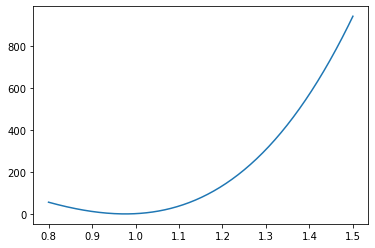

In [ ]:
plt.plot(alpha, RRalpha)
print(alpha[np.argmin(RRalpha)],RRalpha[np.argmin(RRalpha)] )

In [ ]:

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])




# alph=np.pi*0.957
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)


Tarr=[2.0,3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T, alph):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    resid=0

    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph*np.pi) )*(line)
        a=a2/a2[0]-1
        resid=resid+np.sum((a-y)**2)
        
        
    return resid


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
RRalpha2=[]
alpha=np.linspace(0.8,1.5,200)
for alphe in alpha:
    RR=0
    for l,th in enumerate(thets):
        for TT in Tarr:
            dfp=df.copy()
            df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
            df2p=df2.copy()
            df2p['Q']=df2['Q']*np.sign(df2['QFX'])
            Qu=df2p['Q'].unique()
            w=df2p['freq'].unique()
            RR=RR+fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT, alph=alphe)

    
    RRalpha2.append(RR)
    


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

0.9512562814070352 0.061236260498849004


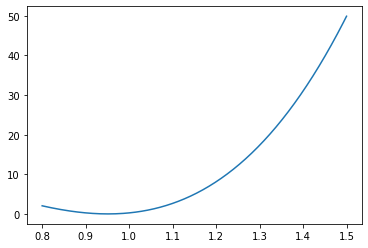

In [ ]:
plt.plot(alpha, RRalpha2)
print(alpha[np.argmin(RRalpha2)],RRalpha2[np.argmin(RRalpha2)] )

In [ ]:

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])




# alph=np.pi*0.957
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)


Tarr=[3.0,4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T, alph):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    resid=0

    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph*np.pi) )*(line)
        a=a2/a2[0]-1
        resid=resid+np.sum((a-y)**2)
        
        
    return resid


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
RRalpha3=[]
alpha=np.linspace(0.8,1.5,200)
for alphe in alpha:
    RR=0
    for l,th in enumerate(thets):
        for TT in Tarr:
            dfp=df.copy()
            df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
            df2p=df2.copy()
            df2p['Q']=df2['Q']*np.sign(df2['QFX'])
            Qu=df2p['Q'].unique()
            w=df2p['freq'].unique()
            RR=RR+fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT, alph=alphe)
    
    RRalpha3.append(RR)
    

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

0.9371859296482412 0.029916276689198794


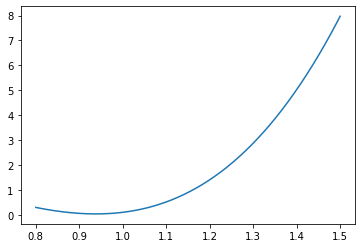

In [ ]:
plt.plot(alpha, RRalpha3)
print(alpha[np.argmin(RRalpha3)],RRalpha3[np.argmin(RRalpha3)] )

In [ ]:

path=pathy+'/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])




# alph=np.pi*0.957
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)


Tarr=[4.0,5.0,10.0]

def fit(df, *args,axi,Q,w,l, T, alph):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    resid=0

    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        a2=(analytical_form(w,T*10.34, alph*np.pi) )*(line)
        a=a2/a2[0]-1
        resid=resid+np.sum((a-y)**2)
        
        
    return resid


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
RRalpha4=[]
alpha=np.linspace(0.8,1.5,200)
for alphe in alpha:
    RR=0
    for l,th in enumerate(thets):
        for TT in Tarr:
            dfp=df.copy()
            df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
            df2p=df2.copy()
            df2p['Q']=df2['Q']*np.sign(df2['QFX'])
            Qu=df2p['Q'].unique()
            w=df2p['freq'].unique()
            RR=RR+fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT, alph=alphe)
    
    RRalpha4.append(RR)
    

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

0.9125628140703518 0.020668144187718784


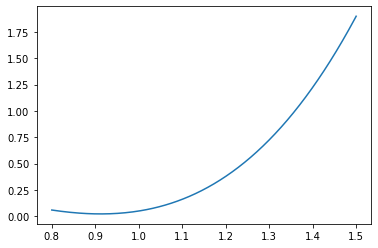

In [ ]:
plt.plot(alpha, RRalpha4)
print(alpha[np.argmin(RRalpha4)],RRalpha4[np.argmin(RRalpha4)] )

In [ ]:
2/0.945

2.1164021164021167

In [ ]:
0.05*2/0.945

0.10582010582010583